# Online Gaming Behavior EDA:
## Descriptive and Inferntial Analyses

dataset: [Kaggle](https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset/data)

____

In terms of this analysis I do not care about PlayerID or InGamePurchases. Also, since theses are all varying games, PlayerLevel is very ambiguous and so is AchievementsUnlocks. One game could only have 10 achievements. A percentage value here would be more descriptive. Same goes for PlayerLevel. What does that mean in terms of any game. Level 100 might be max, where level 50 could max in another game. We will drop these values for all analyses moving forward, including the ML portioned Notebook.

____

## Descriptive Analysis Questions
### 1. Do Males or Females have a higher Engagement Level?
### 2. How does engagement level break up vs. Play Time Hours?
### 3. Do Males or Females have a higher average played time?
### 4. What are the most played game genres based off this dataset?
### 5. What are the typical game genres played, and which is played the most?
### 6. How are the age brackets (15-24, 25-34, 35-44, 45+) represented across Male and Females?
### 7. What are the typical difficulty levels for games played, and which is played the most?
### 8. Which of those difficulty levels are played the most (Play Time Hours)?

____

## Inferential Analysis Questions
### 1. Is there any significant difference in the types of difficulty games Males play vs. Women?
### 2. Is there a link between Game Genre and Engagement Level?
### 3. Does Time Played significantly impact enagement level?
### 4. Does age impact time played?

____

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import pearsonr
import statistics as stat
import statsmodels.api as sm

Read in the CSV file and look at the overall info of the dataset.

In [43]:
df = pd.read_csv('data/online_gaming_behavior.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

No apparentl null values from above, but there might be some unknown 'nulls'

Let's get an idea of our range of numerical values

In [44]:
df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [45]:
df.head(4)

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium


In [46]:
df.InGamePurchases.value_counts()

0    31993
1     8041
Name: InGamePurchases, dtype: int64

InGamePurchases are 0 and 1 so, no or yes. Again this is a very ambiguous value since a yes can mean 100 in game purchases, or it can mean 1 purchase. 

In [47]:
df = df.drop(['PlayerID', 'InGamePurchases', 'PlayerLevel', 'AchievementsUnlocked'], axis=1)

In [48]:
df

,Age,Gender,Location,GameGenre,PlayTimeHours,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,EngagementLevel
0,43,Male,Other,Strategy,16.271119,Medium,6,108,Medium
1,29,Female,USA,Strategy,5.525961,Medium,5,144,Medium
2,22,Female,USA,Sports,8.223755,Easy,16,142,High
3,35,Male,USA,Action,5.265351,Easy,9,85,Medium
4,33,Male,Europe,Action,15.531945,Medium,2,131,Medium
...,...,...,...,...,...,...,...,...,...
40029,32,Male,USA,Strategy,20.619662,Easy,4,75,Medium
40030,44,Female,Other,Simulation,13.539280,Hard,19,114,High
40031,15,Female,USA,RPG,0.240057,Easy,10,176,High
40032,34,Male,USA,Sports,14.017818,Medium,3,128,Medium


In [49]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

This is a petpeeve, but Male/Female is not a Gender classification, so we will rename this to sex.

In [50]:
df = df.rename(columns={'Gender': 'Sex'})


In [51]:
df.Sex.value_counts()

Male      23959
Female    16075
Name: Sex, dtype: int64

In [52]:
df.Location.unique()
# Looks like 4 regions total
df.Location.value_counts()

USA       16000
Europe    12004
Asia       8095
Other      3935
Name: Location, dtype: int64

In [53]:
df.GameGenre.unique()
# And we have 5 genre groups
df.GameGenre.value_counts()

Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: GameGenre, dtype: int64

Let's look at our target column for our future exploration

In [54]:
df.EngagementLevel.unique()

array(['Medium', 'High', 'Low'], dtype=object)

Okay, so only 3 groups to worry about here. We will probably look at encoding this later on for predictions

In [55]:
sorted_unique = sorted(df.Age.unique())

# Reindex the value_counts() to match the sorted order
value_counts_sorted = df.Age.value_counts().reindex(sorted_unique, fill_value=0)

value_counts_sorted

15    1101
16    1138
17    1149
18    1167
19    1139
20    1113
21    1128
22    1150
23    1130
24    1153
25    1108
26    1107
27    1217
28    1108
29    1187
30    1150
31    1228
32    1163
33    1123
34    1103
35    1151
36    1154
37    1219
38    1140
39    1128
40    1202
41    1111
42    1187
43    1180
44    1166
45    1108
46    1121
47    1102
48    1097
49    1106
Name: Age, dtype: int64

Looks like the ages represented are from 15 to 49, with a pretty even spread throughout. That's pretty good sampling. 

In [56]:
# Let's get our headers again for descriptive analysis
df.head(1)

,Age,Sex,Location,GameGenre,PlayTimeHours,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,EngagementLevel
0,43,Male,Other,Strategy,16.271119,Medium,6,108,Medium


_____

## Descriptive Analysis

_____

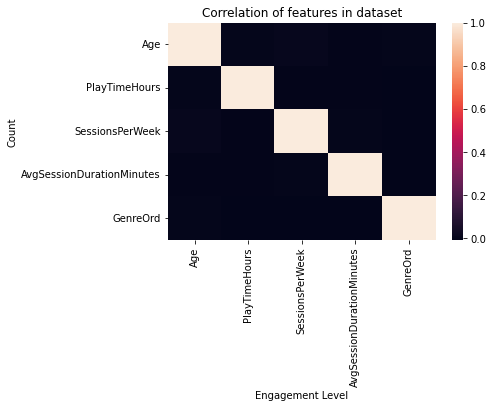

In [86]:
sns.heatmap(df.corr(method='pearson'))

# Set labels and title
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.title('Correlation of features in dataset')

#show the plot
plt.show()

This looks pretty off, but mostly because there are quite a few categorical columns. 

### 1. Do males or females have a higher engagement level?

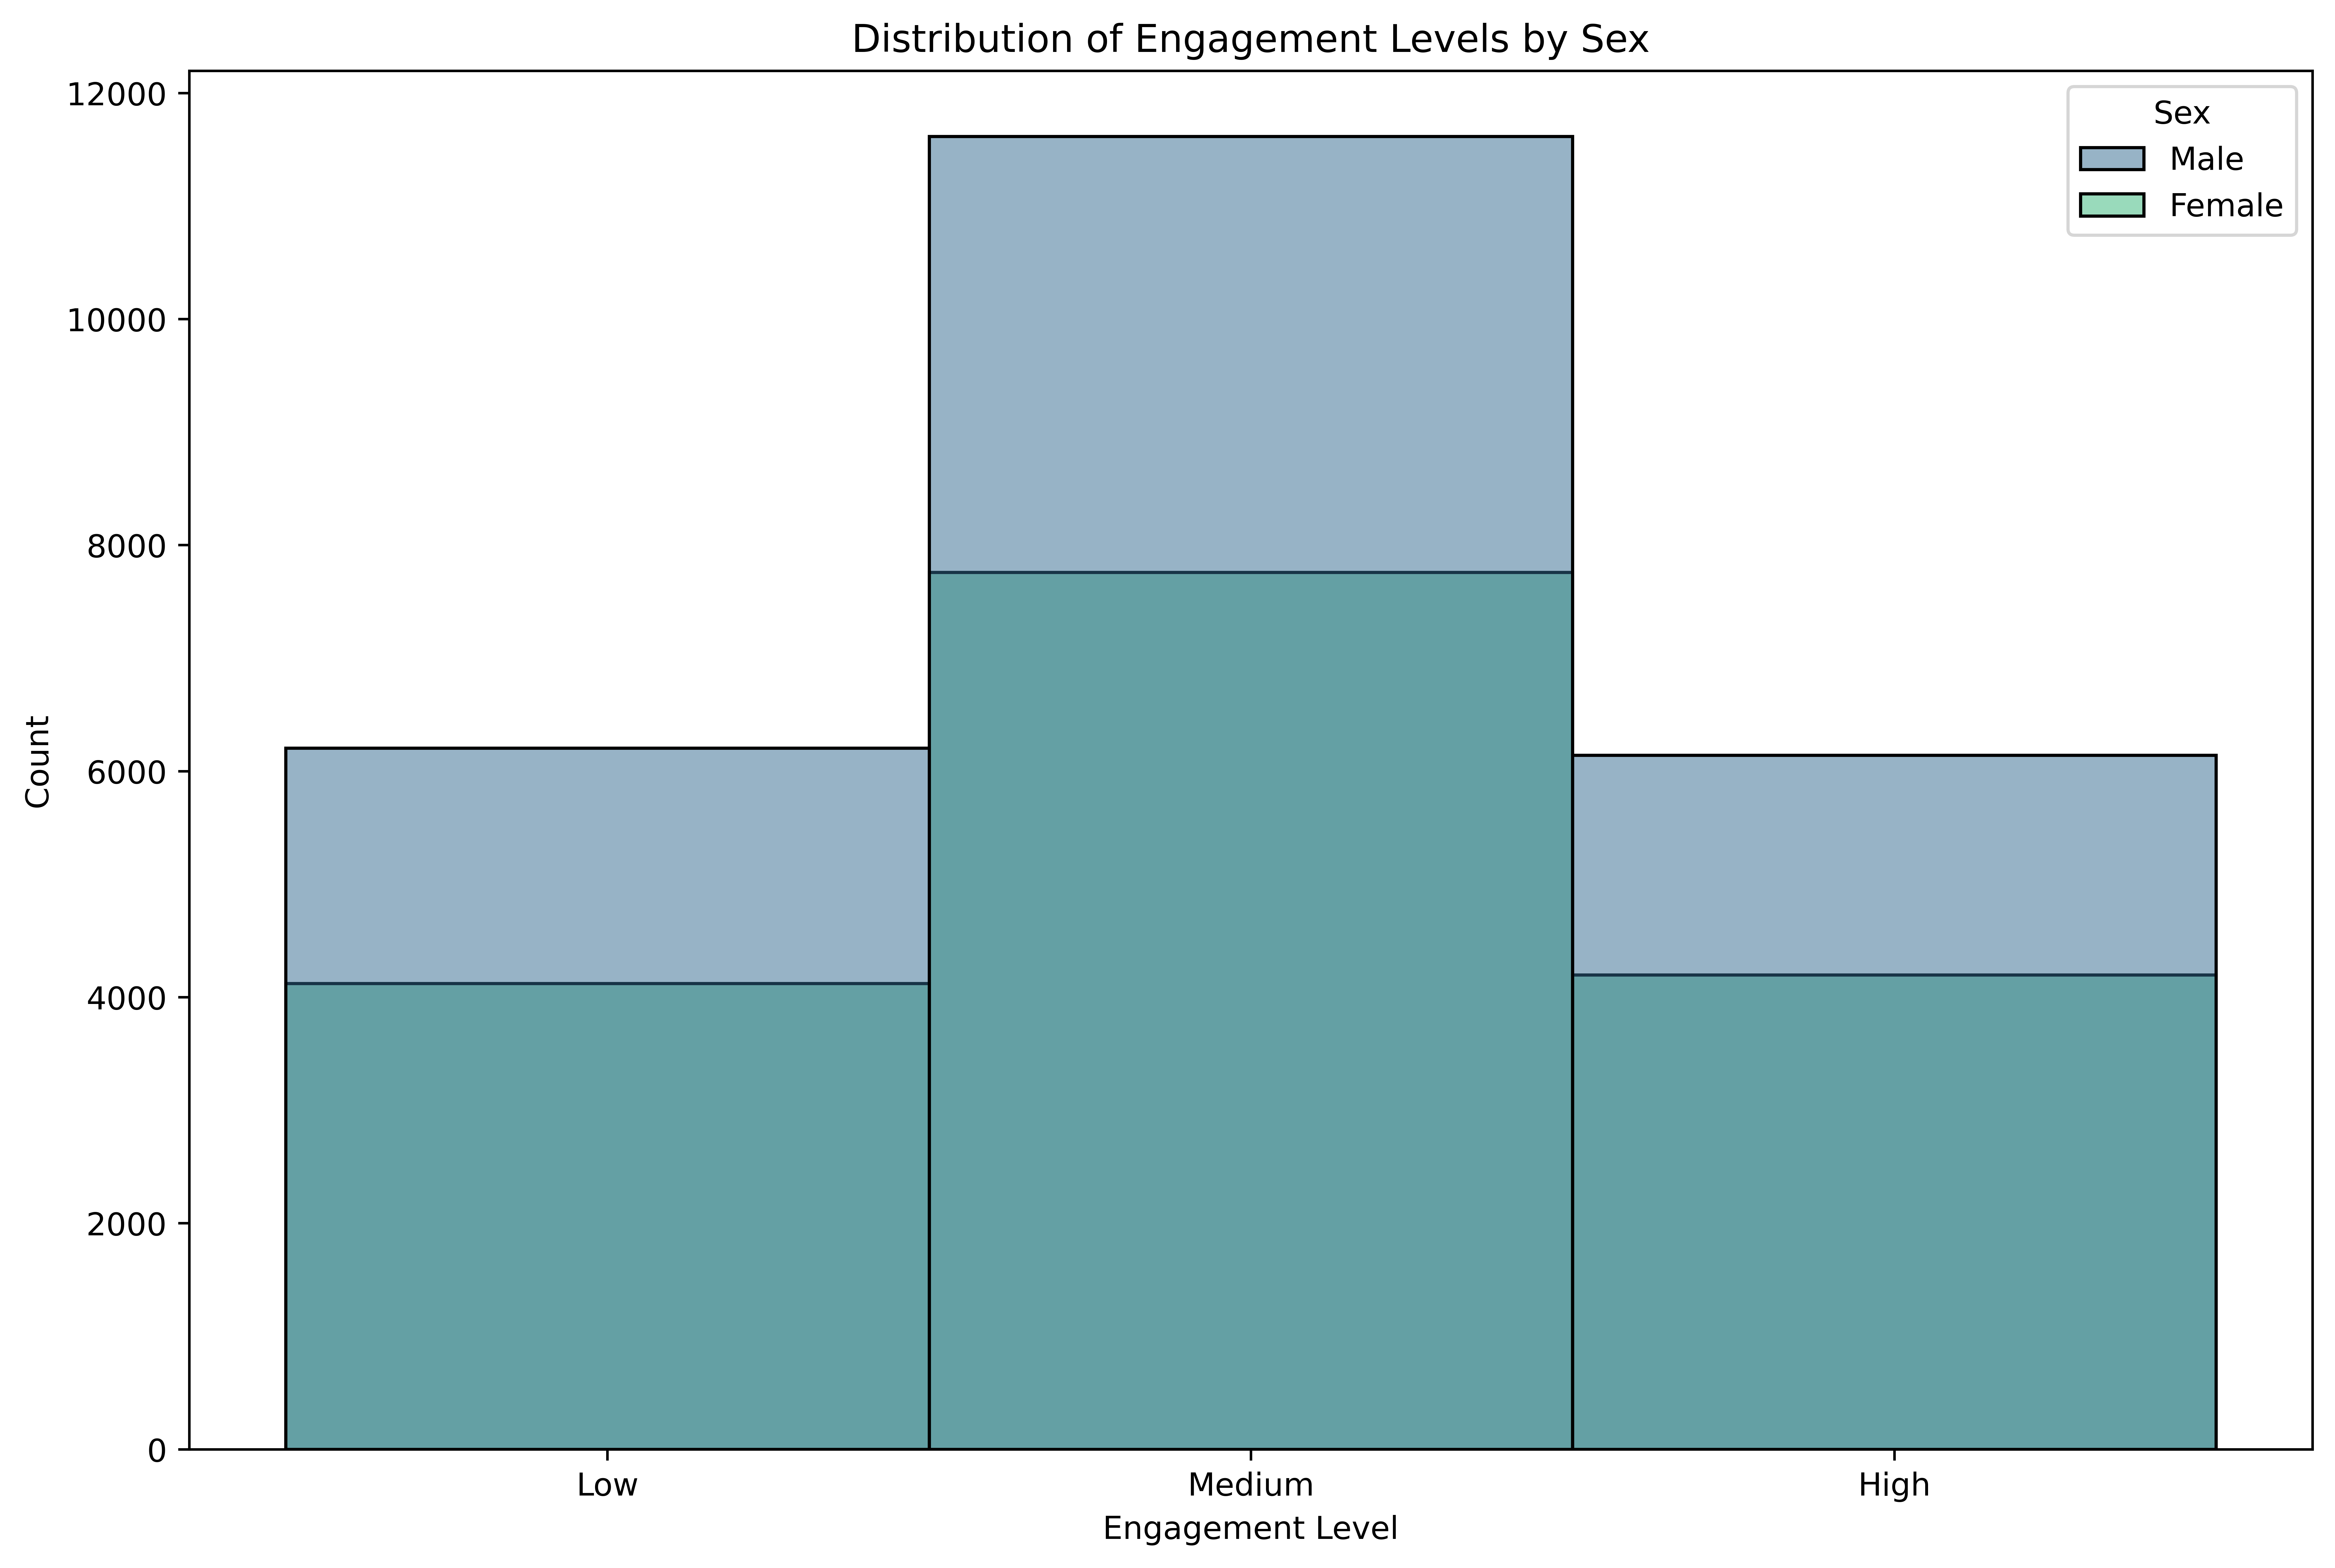

In [93]:
# Order engagement levels
list_order = ['Low', 'Medium', 'High']
df_engaged = df['EngagementLevel'] = pd.Categorical(df['EngagementLevel'], categories=list_order, ordered=True)

# Set plot size
plt.figure(figsize=(12, 8), dpi=800)

sns.histplot(data=df, x='EngagementLevel', hue='Sex', palette='viridis')

# Set labels and title
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.title('Distribution of Engagement Levels by Sex')

plt.savefig('graphs/engagement_levels_by_sex.pdf')
#show the plot
plt.show()


It looks like a medium engagement level is more common among both males and females.

### 2. How does engagement level break up to time played hours?

In [58]:
df_low = df[df['EngagementLevel'] == 'Low']
df_medium = df[df['EngagementLevel'] == 'Medium']
df_high = df[df['EngagementLevel'] == 'High']

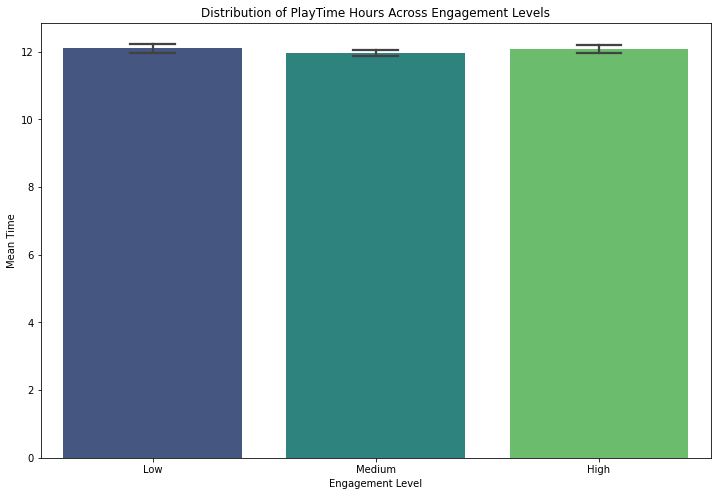

In [59]:
# Set plot size
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(data=df, x='EngagementLevel', y='PlayTimeHours', capsize=0.2, ax=ax, hue='EngagementLevel', palette='viridis')

# Set labels and title
plt.xlabel('Engagement Level')
plt.ylabel('Mean Time')
plt.title('Distribution of PlayTime Hours Across Engagement Levels')

#show the plot
plt.show()

The times are pretty similar across the different engagement levels, which seems a bit odd. Unless play time doesn't have a huge impact on engagement level.

### 3. Do Males or Females have a higher average played time?

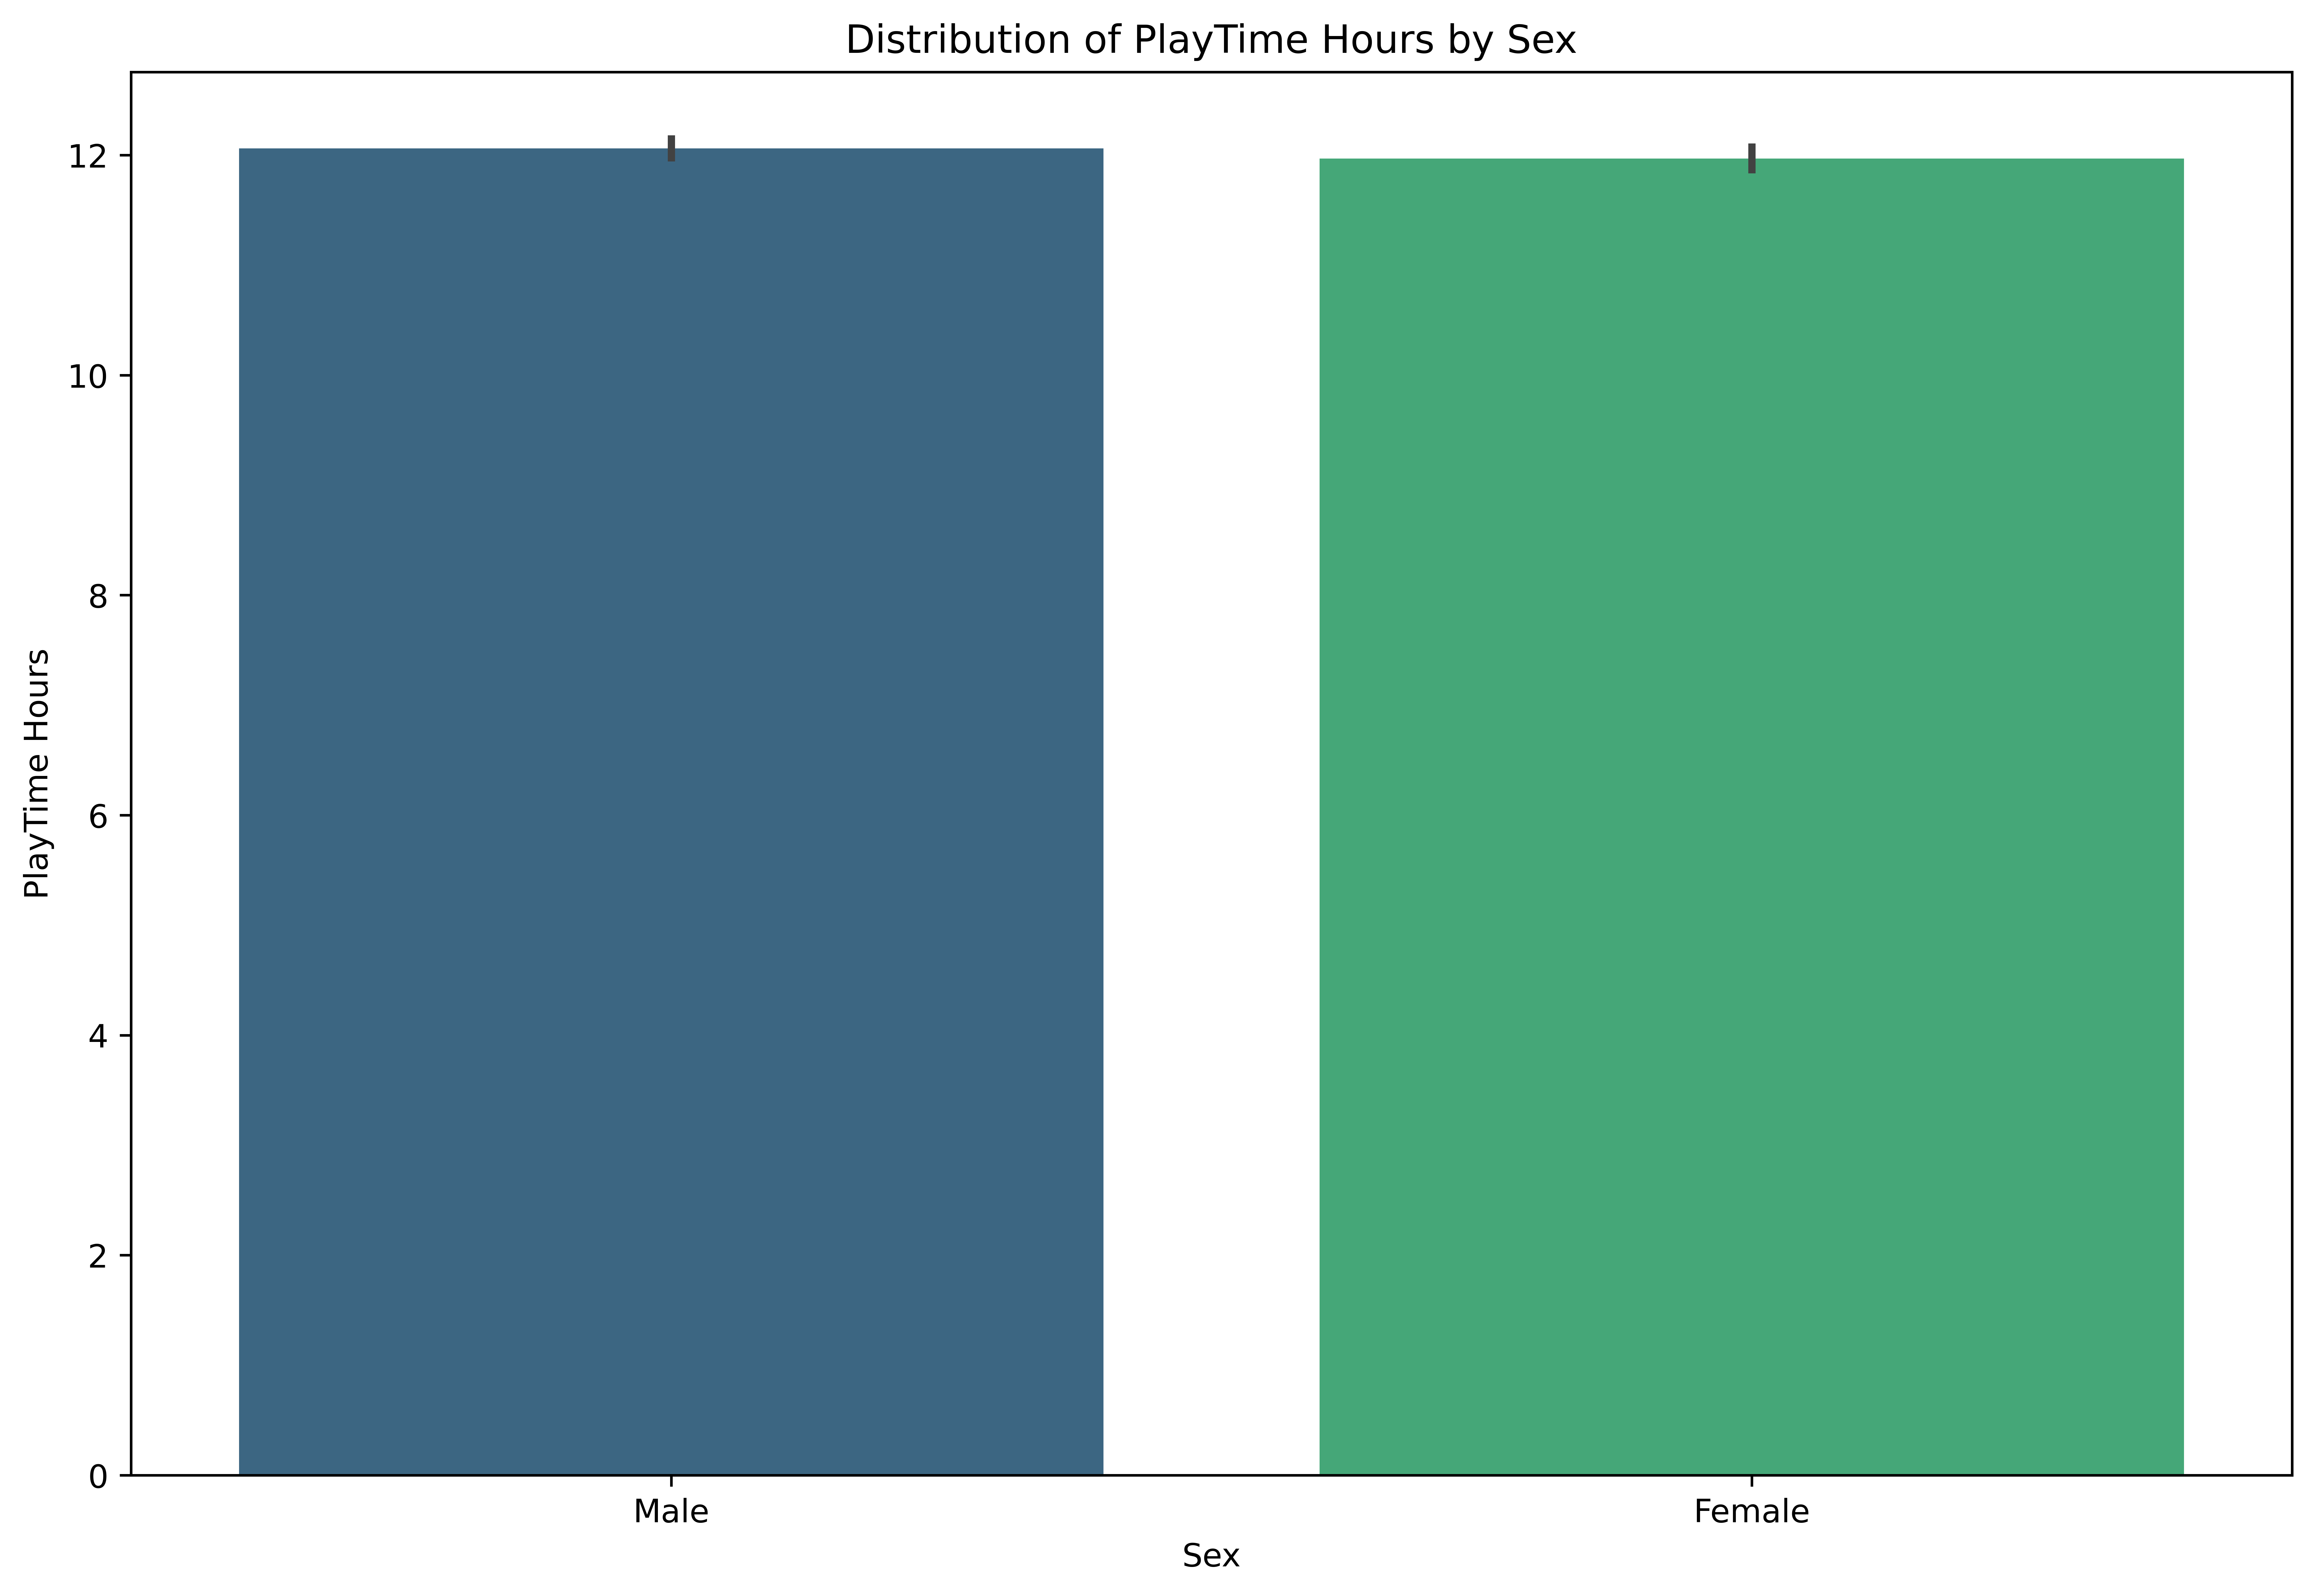

In [94]:
# Set plot size
plt.figure(figsize=(12, 8), dpi=800)

sns.barplot(data=df, x='Sex', y='PlayTimeHours', hue='Sex', palette='viridis')

# Set labels and title
plt.xlabel('Sex')
plt.ylabel('PlayTime Hours')
plt.title('Distribution of PlayTime Hours by Sex')

plt.savefig('graphs/playtime_by_sex.pdf')

# Show the plot
plt.show()

Again, this feels pretty close. This dataset continues to be a solid spread of data

### 4. What are the most played game genres based off this dataset?


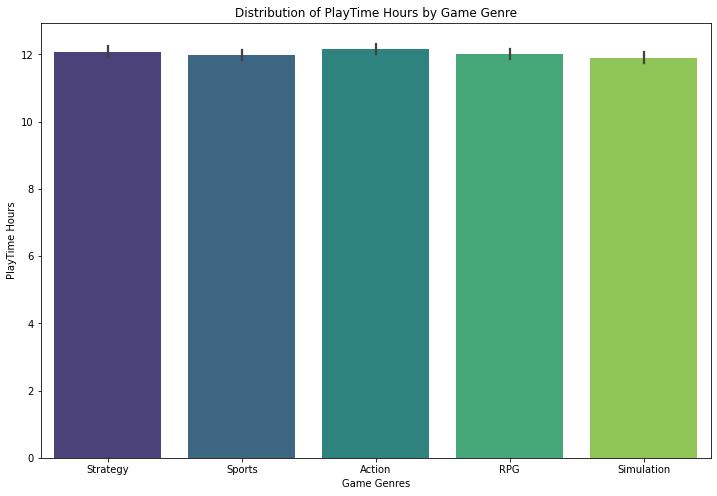

In [61]:
# Set plot size
plt.figure(figsize=(12, 8))

sns.barplot(data=df, x='GameGenre', y='PlayTimeHours', hue='GameGenre', palette='viridis')

# Set labels and title
plt.xlabel('Game Genres')
plt.ylabel('PlayTime Hours')
plt.title('Distribution of PlayTime Hours by Game Genre')


# Show the plot
plt.show()

### 5. What are the typical game genres played, and which is played the most?

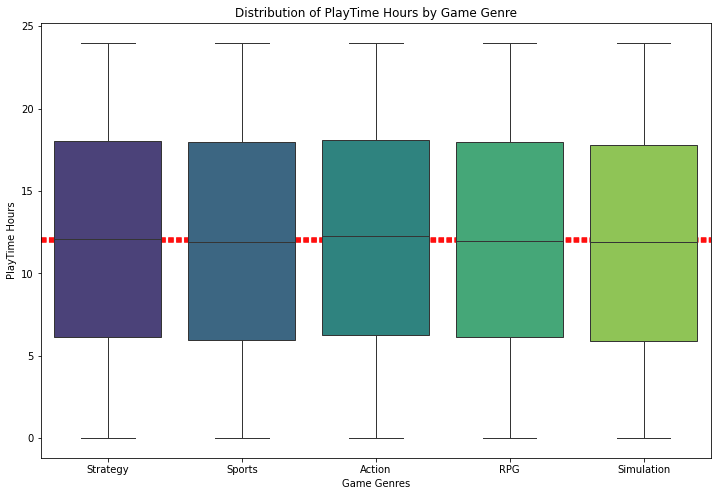

In [62]:
# Set plot size
plt.figure(figsize=(12, 8))

sns.boxplot(x='GameGenre', y='PlayTimeHours', data=df, hue='GameGenre', palette='viridis')

# Calculate and plot the means for each genre
means = df.groupby('GameGenre')['PlayTimeHours'].mean()
for i, mean in enumerate(means):
    plt.axhline(mean, color='red', linestyle='--', label=f'Mean for {means.index[i]}' if i == 0 else "")

# Set labels and title
plt.xlabel('Game Genres')
plt.ylabel('PlayTime Hours')
plt.title('Distribution of PlayTime Hours by Game Genre')


# Show the plot
plt.show()

It seems like, again, the data is pretty well distributed. Action games squeeze by with having a great mean of hours played.

### 6. How are the age brackets (15-24, 25-34, 35-44, 45+) represented across Male and Females?


In [63]:
# create a new column that turns continuous data into categorical

df['AgeCategory'] = pd.cut(df['Age'], [15, 24, 34, 44, 49], labels=['15-24', '25-34', '35-44', '45+'], include_lowest=True)

In [64]:
df

,Age,Sex,Location,GameGenre,PlayTimeHours,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,EngagementLevel,AgeCategory
0,43,Male,Other,Strategy,16.271119,Medium,6,108,Medium,35-44
1,29,Female,USA,Strategy,5.525961,Medium,5,144,Medium,25-34
2,22,Female,USA,Sports,8.223755,Easy,16,142,High,15-24
3,35,Male,USA,Action,5.265351,Easy,9,85,Medium,35-44
4,33,Male,Europe,Action,15.531945,Medium,2,131,Medium,25-34
...,...,...,...,...,...,...,...,...,...,...
40029,32,Male,USA,Strategy,20.619662,Easy,4,75,Medium,25-34
40030,44,Female,Other,Simulation,13.539280,Hard,19,114,High,35-44
40031,15,Female,USA,RPG,0.240057,Easy,10,176,High,15-24
40032,34,Male,USA,Sports,14.017818,Medium,3,128,Medium,25-34


In [65]:
df.AgeCategory.value_counts()

35-44    11638
25-34    11494
15-24    11368
45+       5534
Name: AgeCategory, dtype: int64

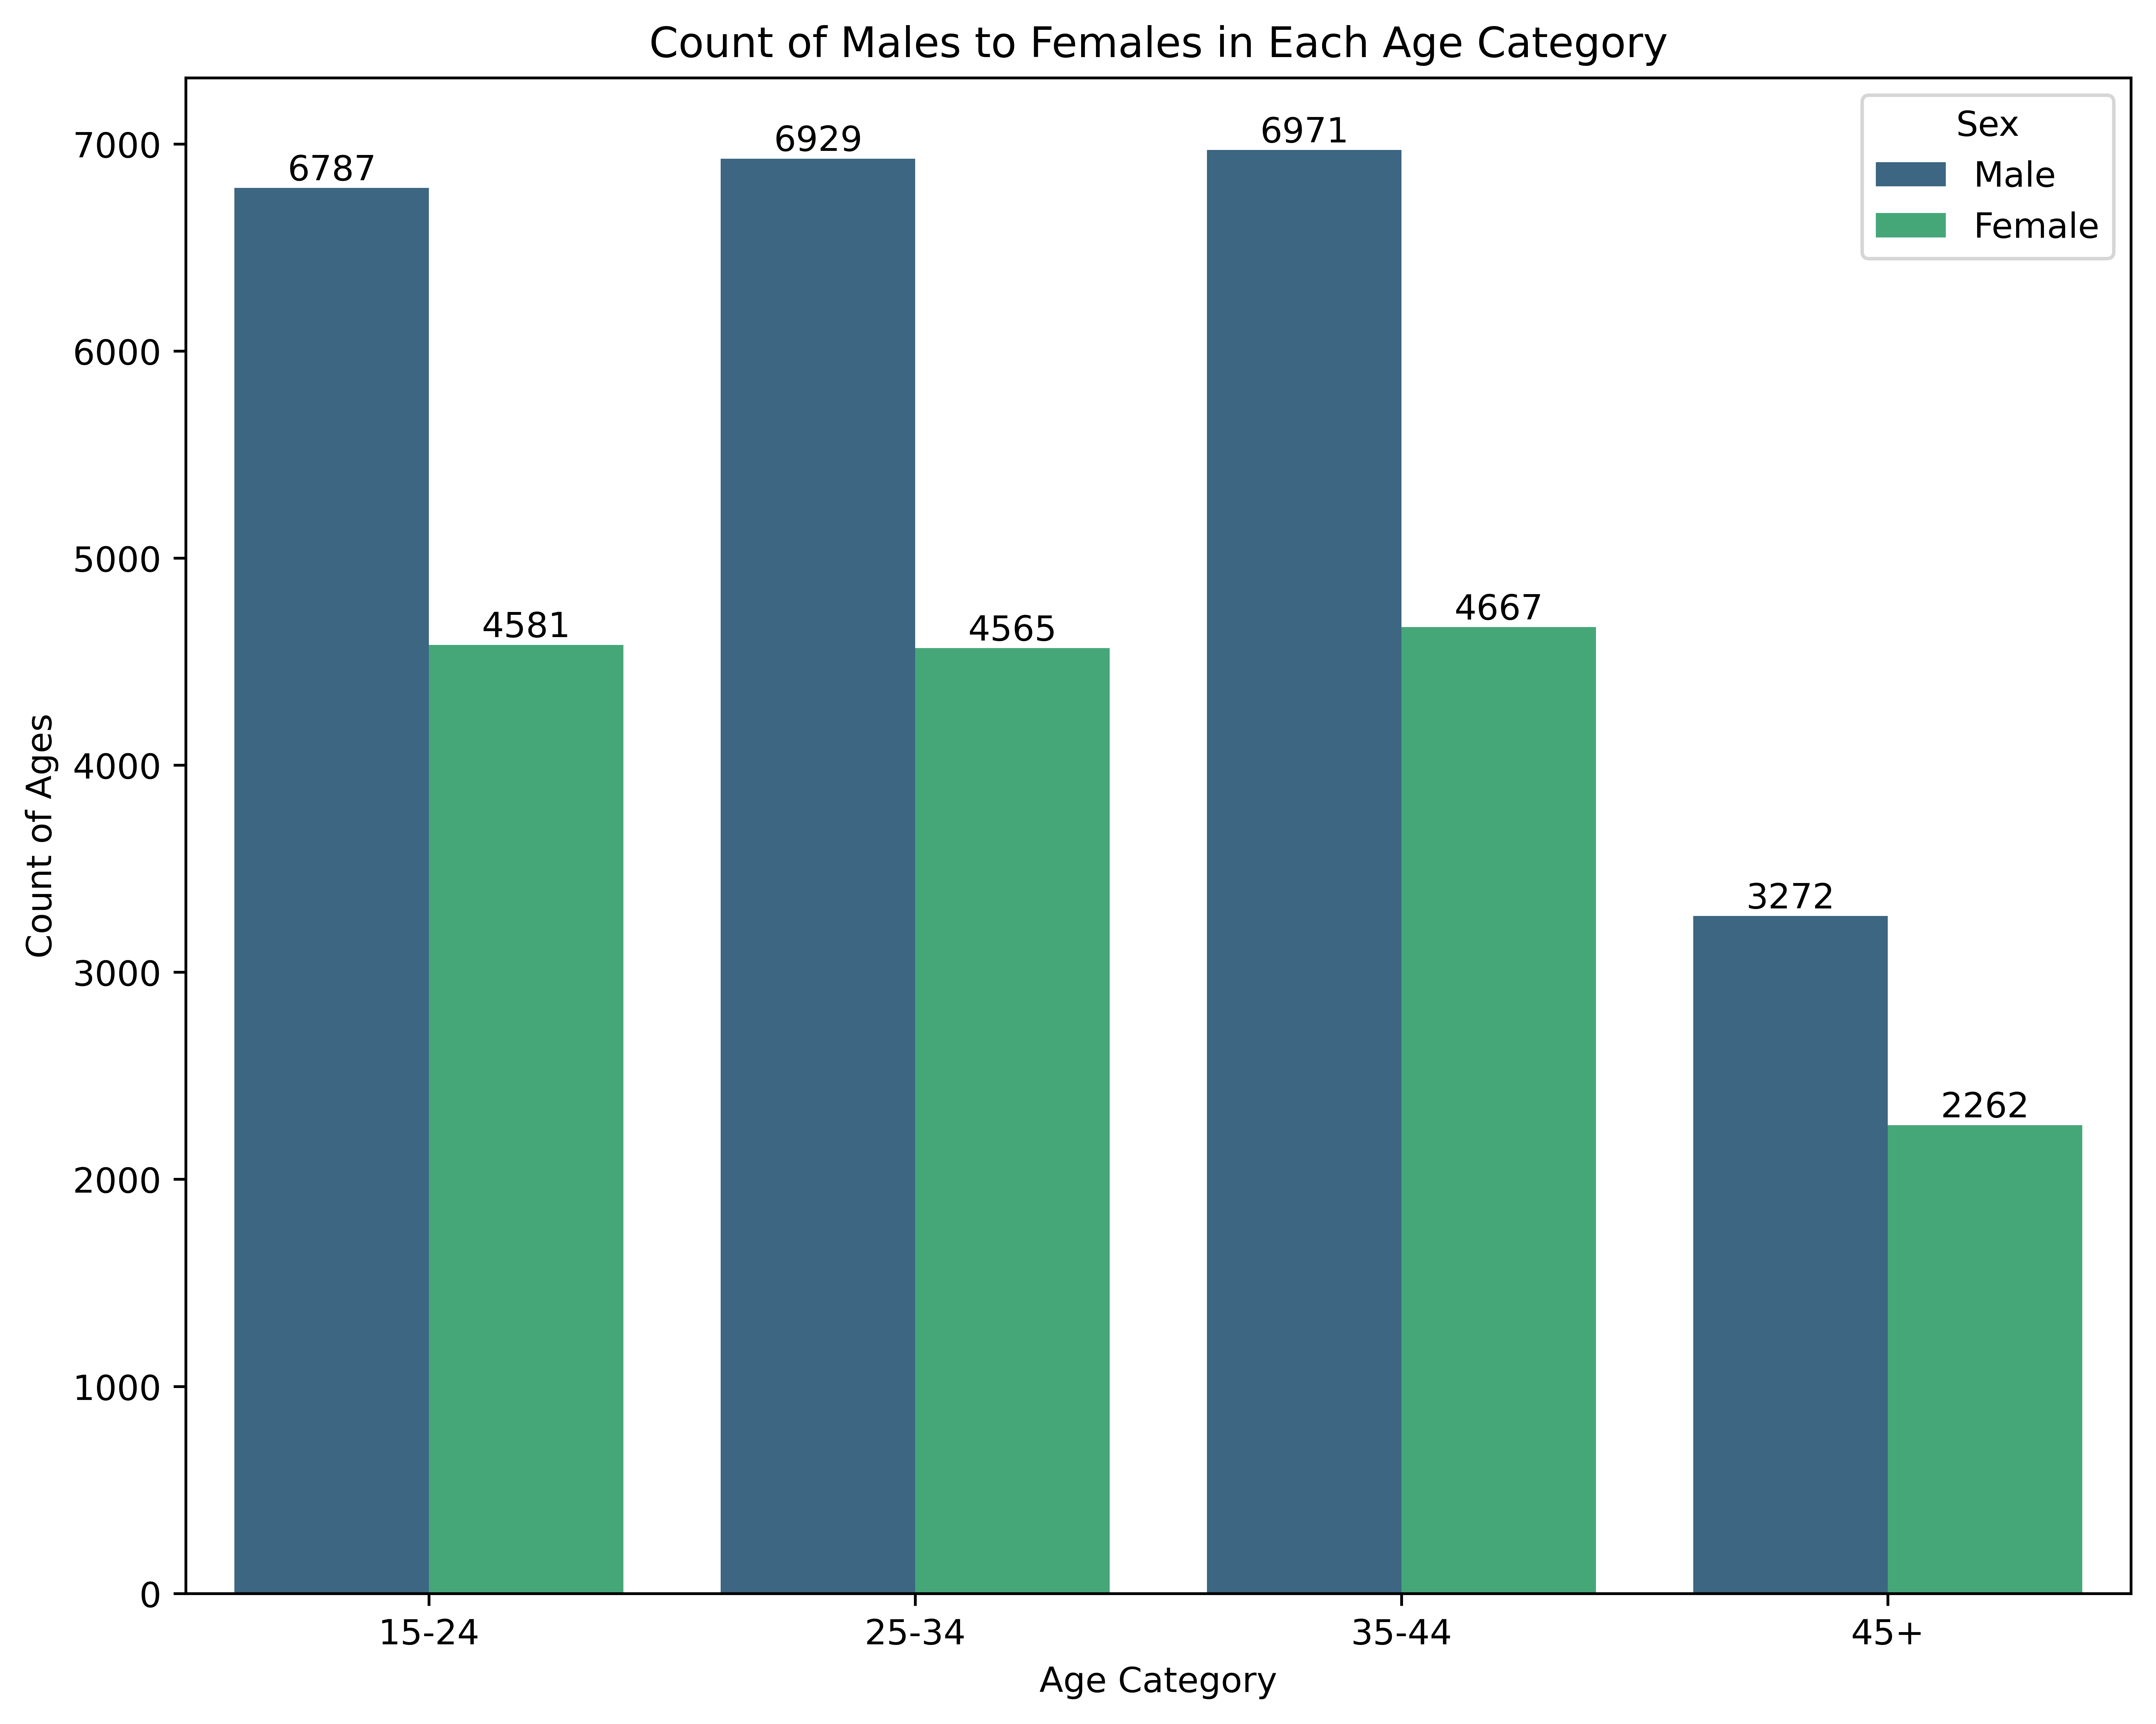

In [95]:
# Set plot size
plt.figure(figsize=(10, 8), dpi=800)

ax = sns.countplot(data=df, x='AgeCategory', hue='Sex', palette='viridis')

# Annotate each bar with the count value
for p in ax.patches:
    height = p.get_height()

    if height > 0:
        ax.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Set labels and title
ax.set_ylabel('Count of Ages')
ax.set_xlabel('Age Category')
ax.set_title('Count of Males to Females in Each Age Category')


plt.savefig('graphs/age_category_by_sex.pdf')

# Show the plot
plt.show()



This data really found a solid make up of age groups for 15-44. It does sort of make sense that 45+ is the smallest category, though it might have a closer ratio of male to female

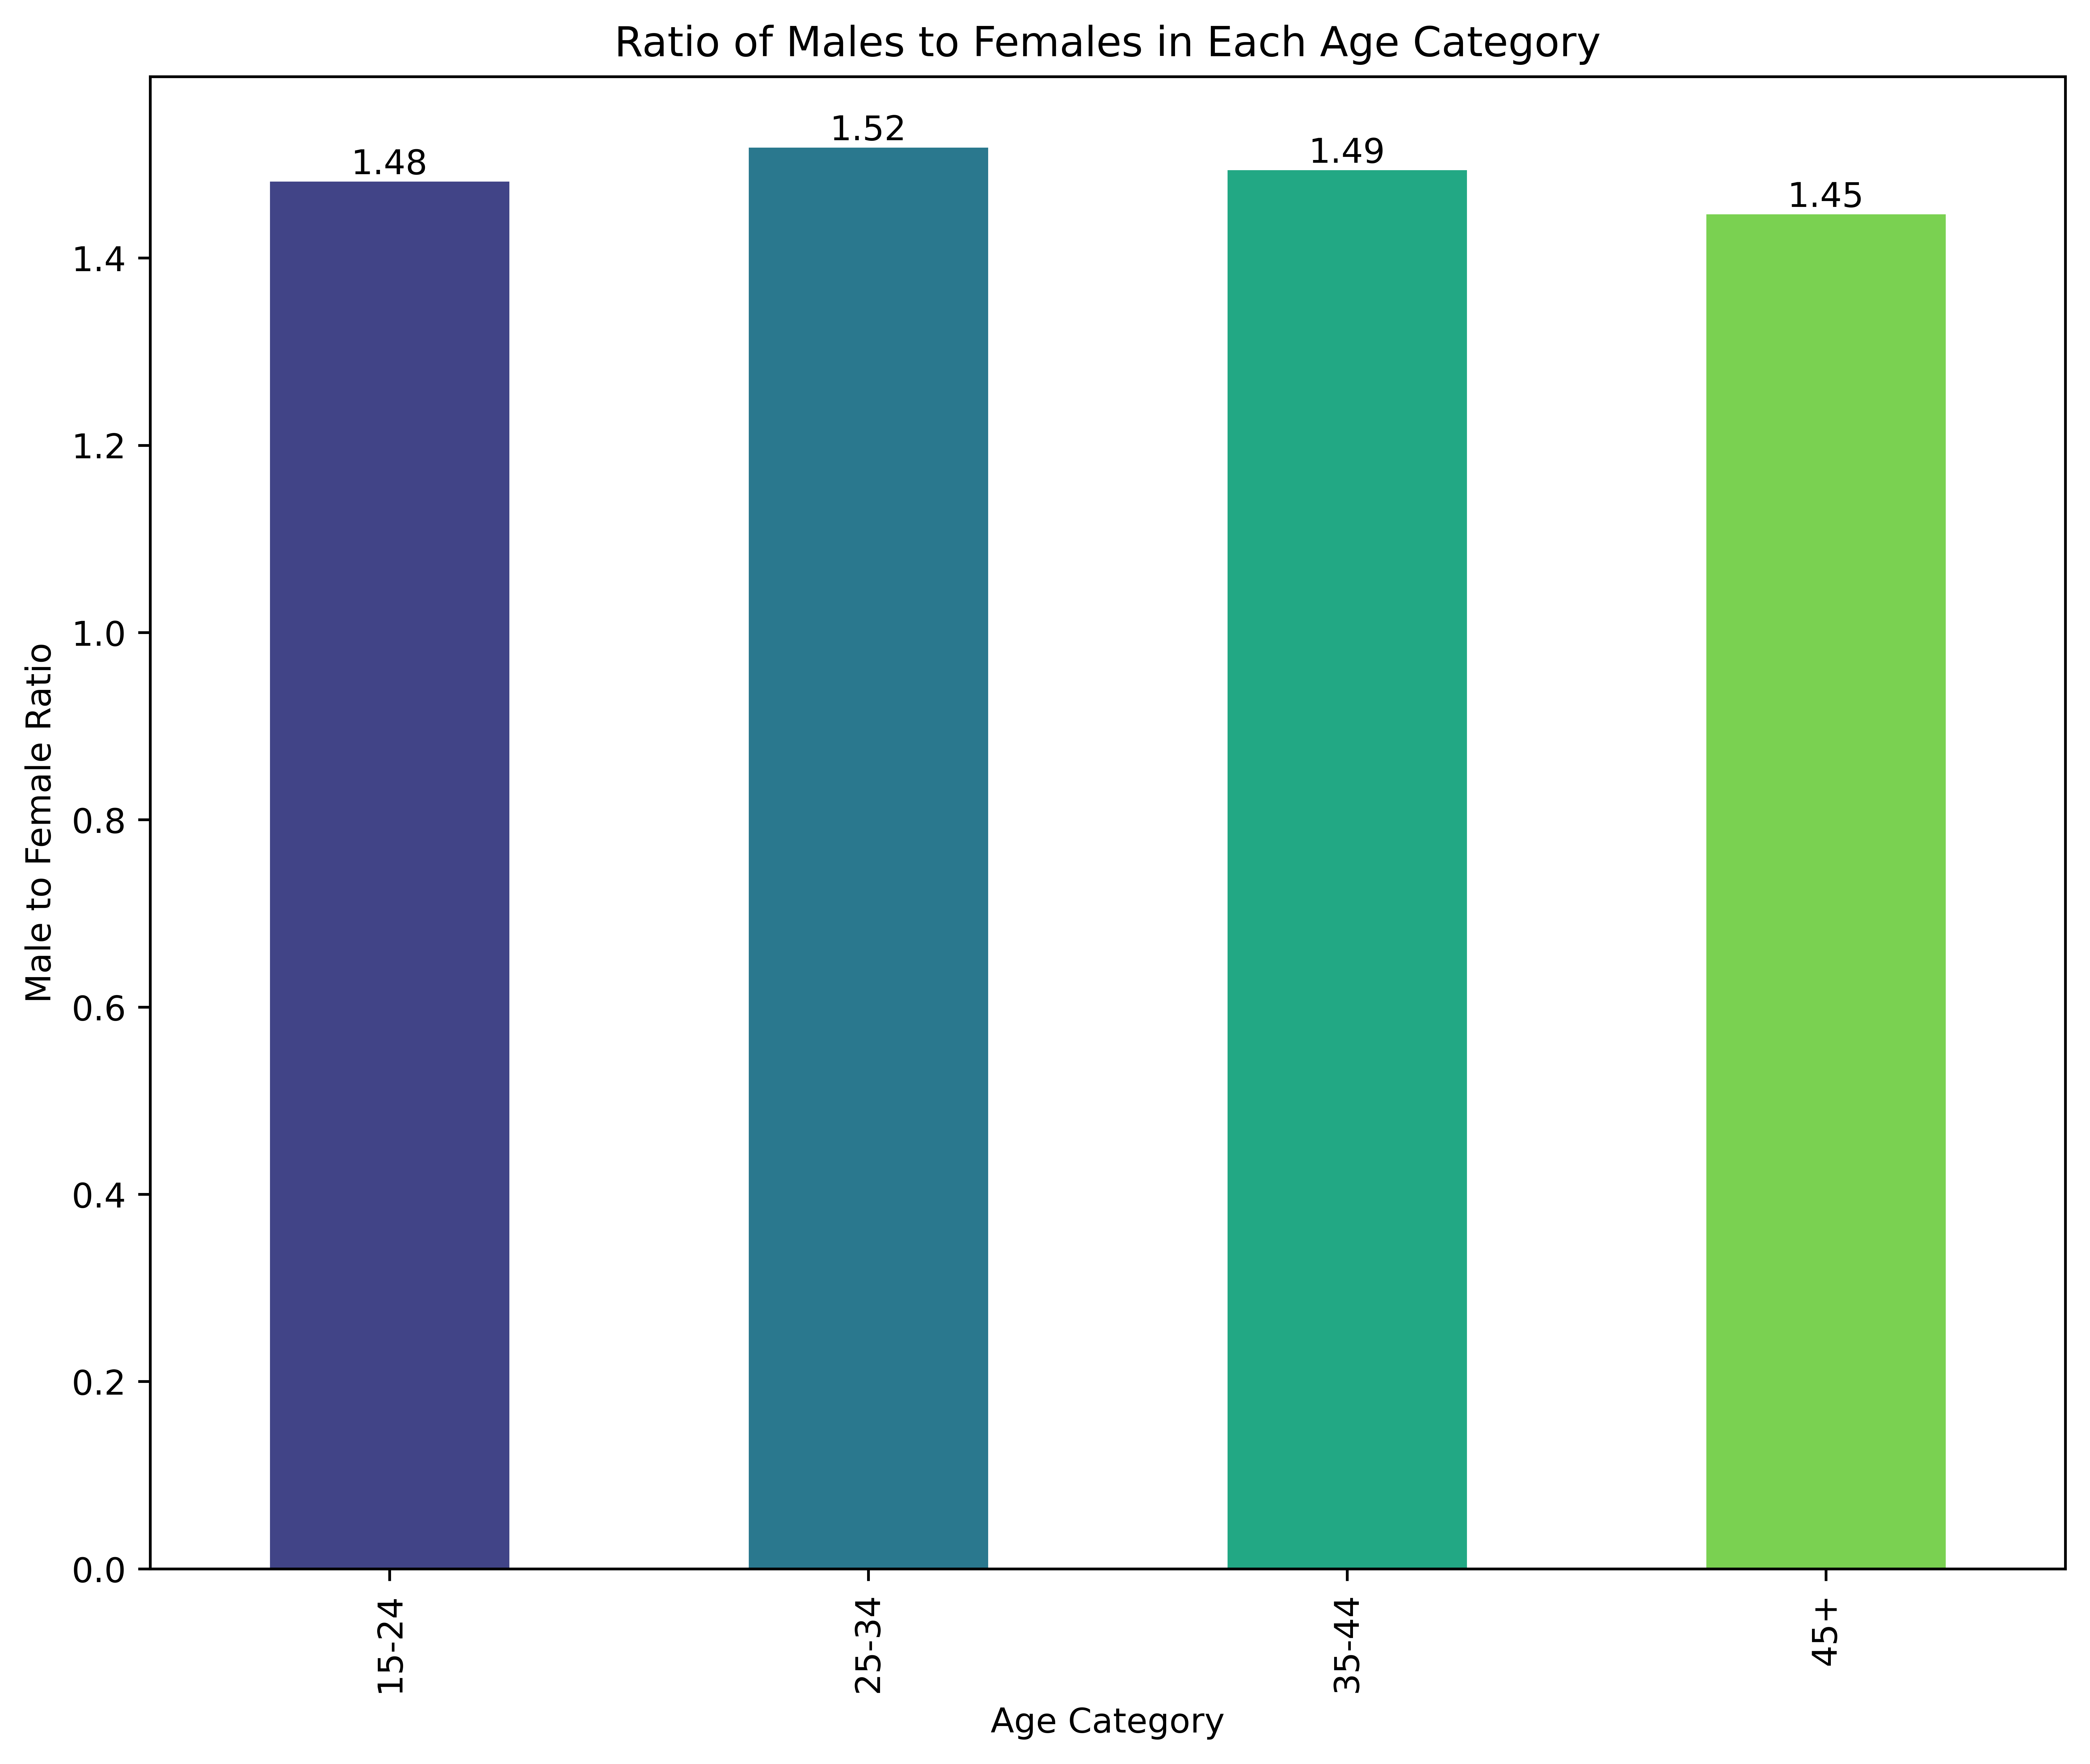

In [96]:
# Count the number of males and females in each age category
counts = df.groupby(['AgeCategory', 'Sex']).size().unstack(fill_value=0)

# Calculate the ratio of males to females
counts['Ratio'] = counts['Male'] / counts['Female']

# Get the color palette from Seaborn
palette = sns.color_palette('viridis', len(df.AgeCategory.unique()))

# Plot the ratios
plt.figure(figsize=(10, 8), dpi=800)
ax = counts['Ratio'].plot(kind='bar', color=palette)

# Annotate the bars with the ratio values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Set labels and title
ax.set_ylabel('Male to Female Ratio')
ax.set_xlabel('Age Category')
ax.set_title('Ratio of Males to Females in Each Age Category')

plt.savefig('graphs/ratio_male_to_female.pdf')
# Show the plot
plt.show()

I guess the 25-34 age range had the best ratio

### 7. What are the typical difficulty levels for games played, and which is played the most?


In [68]:
df.GameDifficulty.unique()

array(['Medium', 'Easy', 'Hard'], dtype=object)

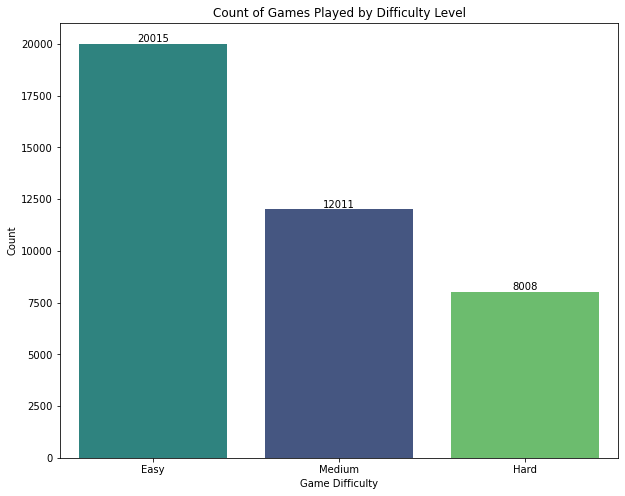

In [69]:
# Set plot size
plt.figure(figsize=(10, 8))

ax = sns.countplot(x='GameDifficulty', data=df, order=['Easy', 'Medium', 'Hard'], hue='GameDifficulty', palette='viridis')

# Add labels and title
plt.xlabel('Game Difficulty')
plt.ylabel('Count')
plt.title('Count of Games Played by Difficulty Level')

# Annotate each bar with the count value
for p in ax.patches:
    height = p.get_height()

    if height > 0:
        ax.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Show the plot
plt.show()

### 8. Which of those difficulty levels are played the most (Play Time Hours)?

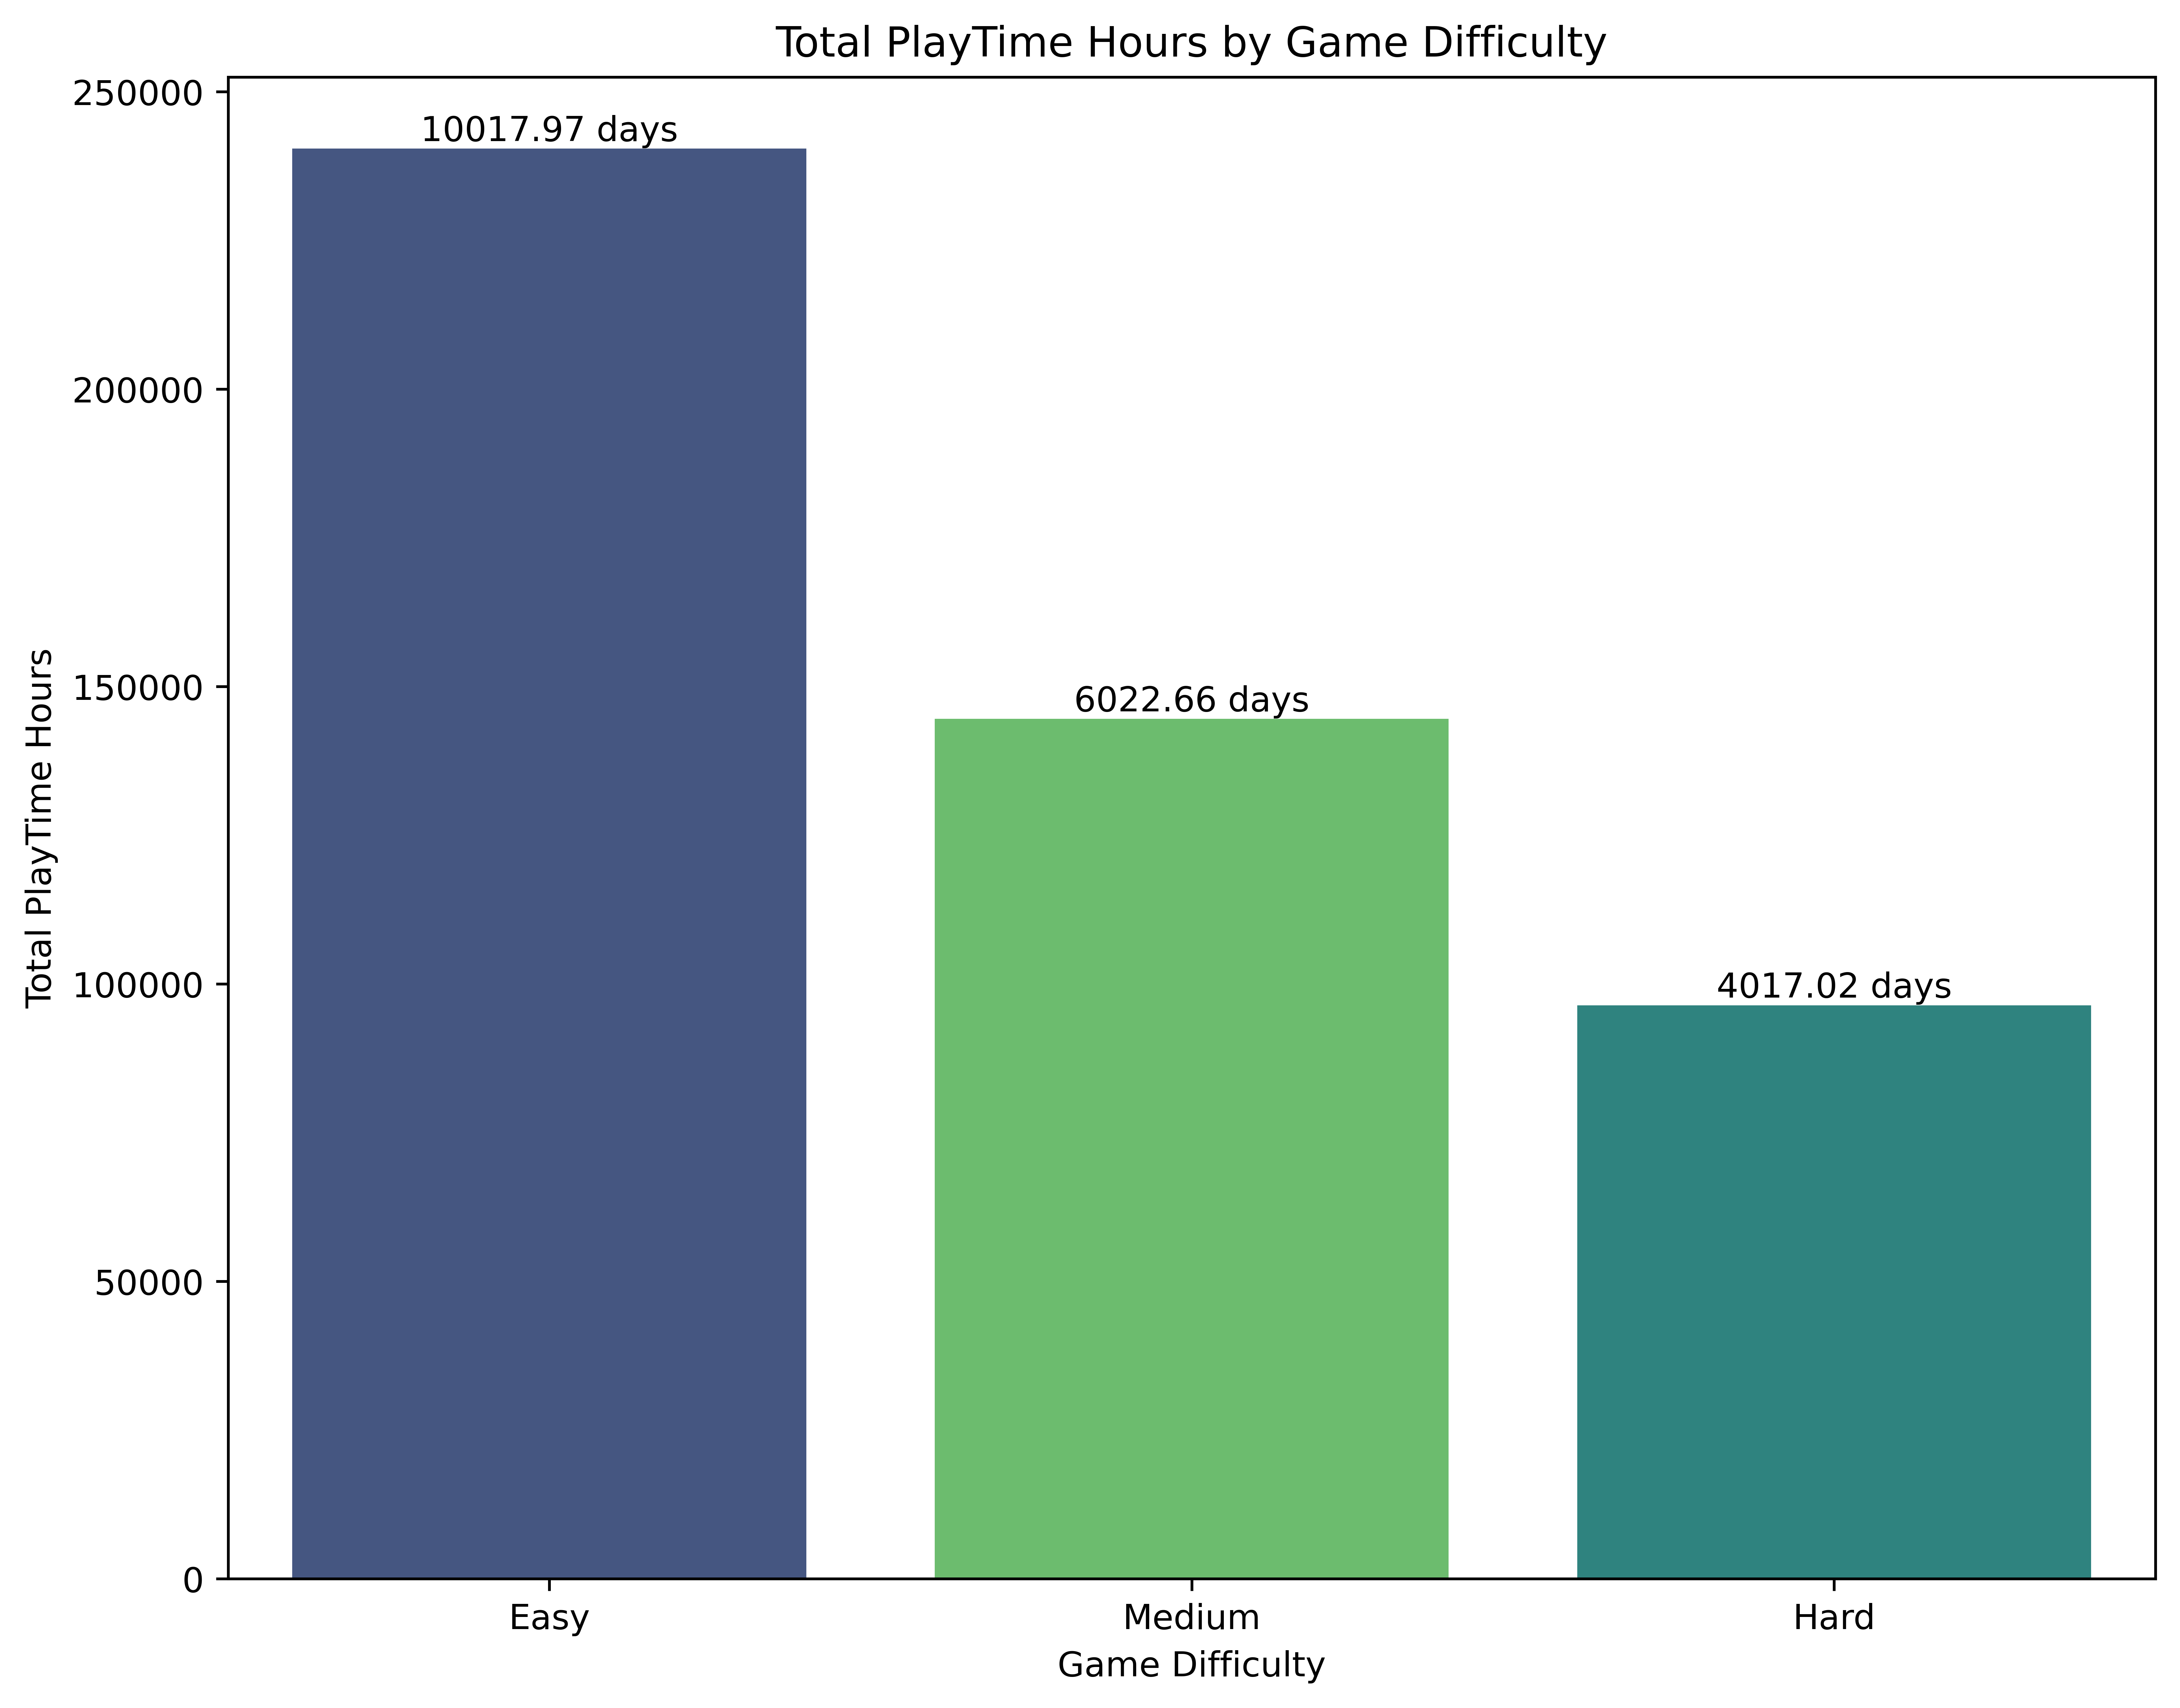

In [97]:
# Calculate total playtime for each difficulty level
total_playtime = df.groupby('GameDifficulty')['PlayTimeHours'].sum().reset_index()

# Set plot size
plt.figure(figsize=(10, 8), dpi=800)

ax = sns.barplot(x='GameDifficulty', y='PlayTimeHours', data=total_playtime, order=['Easy', 'Medium', 'Hard'], hue='GameDifficulty', palette='viridis')

# Annotate each bar with the count value
for p in ax.patches:
    height = p.get_height()

    if height > 0:
        ax.annotate(f'{height / 24:.2f} days', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Add labels and title
plt.xlabel('Game Difficulty')
plt.ylabel('Total PlayTime Hours')
plt.title('Total PlayTime Hours by Game Difficulty')

plt.savefig('graphs/playtime_by_difficulty.pdf')

# Show the plot
plt.show()

____

____

## Inferential Analysis

____

In [71]:
df.head(5)

,Age,Sex,Location,GameGenre,PlayTimeHours,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,EngagementLevel,AgeCategory
0,43,Male,Other,Strategy,16.271119,Medium,6,108,Medium,35-44
1,29,Female,USA,Strategy,5.525961,Medium,5,144,Medium,25-34
2,22,Female,USA,Sports,8.223755,Easy,16,142,High,15-24
3,35,Male,USA,Action,5.265351,Easy,9,85,Medium,35-44
4,33,Male,Europe,Action,15.531945,Medium,2,131,Medium,25-34


### 1. Is there any significant difference in the types of difficulty games Males play vs. Females?


H0: There is no significant difference in the game difficulty preferences between males and females\
HA: There is a significant difference in the game difficulty preferences between males and females

In [72]:
# Set alpha
alpha = 0.05

# Create a contingency table
contingency_table = pd.crosstab(df['Sex'], df['GameDifficulty'])

# Perform Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Conclusion
if p < alpha:
    print("Reject the Null: There is a significant difference in game difficulty preferences between Males and Females.")
else:
    print("Failed to Reject the Null: There is no significant difference in game difficulty preferences between Males and Females.")

Chi-square Statistic: 2.144459945455983
P-value: 0.3422444699984688
Degrees of Freedom: 2
Expected Frequencies:
[[ 8036.69693261  3215.48184044  4822.82122696]
 [11978.30306739  4792.51815956  7188.17877304]]
Failed to Reject the Null: There is no significant difference in game difficulty preferences between Males and Females.


### 2. Is there a link between Game Genre and Engagement Level?


H0: There is no significant link between Game Genre and Engagement Level\
HA: There is a significant link between Game Genre and Engagement Level

In [73]:
# Set alpha
alpha = 0.05

# Create a contingency table
contingency_table = pd.crosstab(df['GameGenre'], df['EngagementLevel'])

# Perform Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Conclusion
if p < alpha:
    print("Reject the Null: There is a significant link between Game Genre and Engagement Level.")
else:
    print("Failed to Reject Null: There is no significant link between Game Genre and Engagement Level.")

Chi-square Statistic: 8.611218189112535
P-value: 0.37614627228464403
Degrees of Freedom: 8
Expected Frequencies:
[[2073.1037618  3890.3828246  2075.5134136 ]
 [2050.66813209 3848.28016186 2053.05170605]
 [2058.66243693 3863.28226008 2061.05530299]
 [2075.42468901 3894.73827247 2077.83703852]
 [2066.14098017 3877.31648099 2068.54253884]]
Failed to Reject Null: There is no significant link between Game Genre and Engagement Level.


In [74]:
df.GameGenre.unique()

array(['Strategy', 'Sports', 'Action', 'RPG', 'Simulation'], dtype=object)

In [75]:
df['GenreOrd'] = df['GameGenre']
df.GenreOrd.replace(['Strategy', 'Sports', 'Action', 'RPG', 'Simulation'], [1, 2, 3, 4, 5], inplace=True)

In [76]:
# To Compare a bunch of series to check for significance

from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['GenreOrd'], df['EngagementLevel'])
print(mc.tukeyhsd())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  High    Low   0.0259 0.3857 -0.0201  0.072  False
  High Medium  -0.0056    0.9 -0.0459 0.0348  False
   Low Medium  -0.0315 0.1597 -0.0719 0.0088  False
---------------------------------------------------


<Figure size 8000x6400 with 0 Axes>

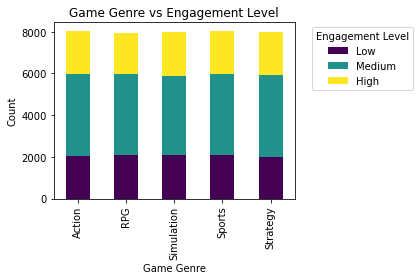

In [98]:
plt.figure(figsize=(10,8), dpi=800)

# Plotting the stacked bar chart
contingency_table.plot(kind='bar', stacked=True, colormap='viridis')

# Adding title and labels
plt.title('Game Genre vs Engagement Level')
plt.xlabel('Game Genre')
plt.ylabel('Count')
plt.legend(title='Engagement Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.savefig('graphs/genre_vs_engagement.pdf')

plt.show()

### 3. Does Time Played significantly impact Engagement Level?

H0: Time played has no significant impact on engagement level.\
HA: Time played does have a significant impact on engagement level.

In [78]:
# function for ANOVA tests

def anova(feature, label):
    groups = df[feature].unique()
    grouped_values = []
    for group in groups:
        grouped_values.append(df[df[feature]==group][label])
    return stats.f_oneway(*grouped_values)


In [79]:
# Set alpha level
alpha = 0.05

feature = 'EngagementLevel' # the independent categorical data
label = 'PlayTimeHours' # the numeric data

s, p = anova(feature, label)
print("P-value:", p)

# Conclusion
if p < alpha:
    print("Reject the Null: Time played does have a significant impact on engagement level.")
else:
    print("Failed to Reject Null: Time played has no significant impact on engagement level.")



P-value: 0.1613962777558119
Failed to Reject Null: Time played has no significant impact on engagement level.


### 4. Does age impact time played?

H0: Age has no significant impact on time played.\
HA: Age does have a significant impact on time played.

In [80]:
# Set alpha level
alpha = 0.05

# Define the independent variable (Age) and dependent variable (PlayTimeHours)
X = df['Age']
y = df['PlayTimeHours']

# Add a constant to the independent variable matrix (for intercept)
X = sm.add_constant(X)

# Perform the linear regression
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Get the p-value for the slope
p_value = model.pvalues[1]

# Conclusion based on the p-value and alpha level
if p_value < alpha:
    print(f"Reject the null hypothesis (p-value: {p_value:.4f}). Age has a significant impact on time played.")
else:
    print(f"Fail to reject the null hypothesis (p-value: {p_value:.4f}). Age does not have a significant impact on time played.")

                            OLS Regression Results                            
Dep. Variable:          PlayTimeHours   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2427
Date:                Thu, 22 Aug 2024   Prob (F-statistic):              0.622
Time:                        10:13:54   Log-Likelihood:            -1.3422e+05
No. Observations:               40034   AIC:                         2.684e+05
Df Residuals:                   40032   BIC:                         2.685e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9701      0.115    103.741      0.0

In [81]:
# Set alpha level
alpha = 0.05

# Calculate the Pearson correlation coefficient and the p-value
corr_coefficient, p_value = pearsonr(df['Age'], df['PlayTimeHours'])

# Print the results
print(f"Pearson Correlation Coefficient: {corr_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion based on the p-value and alpha level
if p_value < alpha:
    print(f"Reject the null hypothesis (p-value: {p_value:.4f}). Age has a significant impact on time played.")
else:
    print(f"Fail to reject the null hypothesis (p-value: {p_value:.4f}). Age does not have a significant impact on time played.")

Pearson Correlation Coefficient: 0.0025
P-value: 0.6223
Fail to reject the null hypothesis (p-value: 0.6223). Age does not have a significant impact on time played.


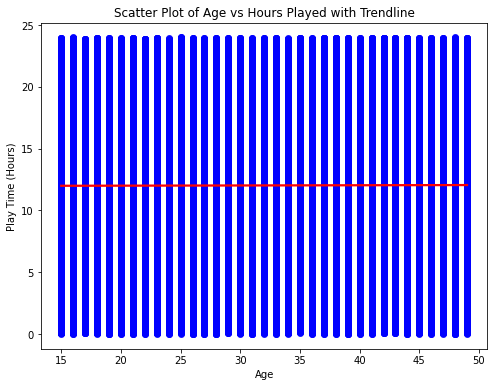

In [82]:
# Create a scatter plot with a trendline
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='PlayTimeHours', data=df, ci=None, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

# Adding title and labels
plt.title('Scatter Plot of Age vs Hours Played with Trendline')
plt.xlabel('Age')
plt.ylabel('Play Time (Hours)')

# Show the plot
plt.show()

## Summary

Do Males or Females have a higher Engagement Level?\
How does engagement level break up vs. Play Time Hours?\
Do Males or Females have a higher average played time?\
What are the most played game genres based off this dataset?\
What are the typical game genres played, and which is played the most?\
How are the age brackets (15-24, 25-34, 35-44, 45+) represented across Male and Females?\
What are the typical difficulty levels for games played, and which is played the most?\
Which of those difficulty levels are played the most (Play Time Hours)?

After asking the above questions, it became pretty clear that the person who catered this data did a great job finding a variety of samples that were well representated across pretty much all features. It did make the inference section tough to find anything of significant impact. 

1. Is there any significant difference in the types of difficulty games Males play vs. Women?\
H0: There is no significant difference in the game difficulty preferences between males and females\
HA: There is a significant difference in the game difficulty preferences between males and females\

We were looking into finding connections to player engagement. I wanted to see if males favor a certain type of game difficulty over females. We ran a chi squared test and the results were not significant.  \
Failed to Reject the Null

2. Is there a link between Game Genre and Engagement Level?\
H0: There is no significant link between Game Genre and Engagement Level\
HA: There is a significant link between Game Genre and Engagement Level\

To have a better understanding of the types of games that draw the most engagement we focused on another chi squared test. I thought there might be something stronger here, but it could be the dataset being very diverse, but no significant findings.\
Failed to Reject Null

3. Does time significantly impact engagement level?\
H0: Time played has no significant impact on engagement level.\
HA: Time played does have a significant impact on engagement level.

I really thought this value would have an significant finding. I also wanted to use an ANOVA test to shake things up.\
Failed to Reject Null

4. Does age impact time played?\
H0: Age has a significant impact on time played.\
HA: Age does not have a significant impact on time played.\

For this one I ran a pearsonR test and like the pervious question, I figured age would impact time played, but there wasn't enough of a significance shown in this dataset.\ 
Fail to reject the null hypothesis

Though all 4 we failed to reject any of the hypotheses , I think with more time I could have focused on some other components of this data to find some areas. It probably would be good to add a correlation section for the data. This is what I would work on in the future. 

___

## References 

___

I used [this playlist](https://www.youtube.com/playlist?list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4) from Mark Keith on youtube to help with some syntax for inferential tests.